In [1]:
# project: p11
# submitter: zchen697
# partner: crzhong

In [2]:
import os, json, csv, copy
import numpy as np
import pandas as pd
from collections import namedtuple
%matplotlib inline

In [3]:
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [4]:
def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f)

In [5]:
def get_mapping(path):
    target_file = open(path, encoding="utf-8")
    target_file = csv.reader(target_file)
    target_file = list(target_file)
    return target_file

In [6]:
Tweet = namedtuple("Tweet", ["tweet_id", "username", "num_liked", "length"])

In [7]:
def get_tupleresult(sample):
    target_list = []
    header = sample[0]
    for i in range(len(sample)):
        if i == 0:
            continue
        if sample[i][header.index("tweet_id")].isdigit() == False:
            continue
        if sample[i][header.index("username")].startswith("USERID") == False:
            continue
        if sample[i][header.index("num_liked")].isdigit() == False:
            continue
        if type(sample[i][header.index("tweet_text")]) == bool or sample[i][header.index("tweet_text")] == None:
            continue
        else:
            target_list.append(Tweet(tweet_id=sample[i][header.index("tweet_id")],username=sample[i][header.index("username")],num_liked=int(sample[i][header.index("num_liked")]),length=int(len(sample[i][header.index("tweet_text")]))))
    return target_list
    

In [8]:
def get_jsonresult(sample):
    target_key = []
    target_list = []
    for i in sample.keys():
        target_key.append(i)
    for i in range(len(sample)):
        if target_key[i].isdigit() == False:
            continue
        if sample[target_key[i]]["username"].startswith("USERID") == False:
            continue
#         if sample[target_key[i]]["num_liked"].isdigit() == False:
#             continue
        if type(sample[target_key[i]]["tweet_text"]) == bool or sample[target_key[i]]["tweet_text"] == None:
            continue
        else:
            target_list.append(Tweet(tweet_id=target_key[i],username=sample[target_key[i]]["username"],num_liked=sample[target_key[i]]["num_liked"],length=len(sample[target_key[i]]["tweet_text"])))
    return target_list

In [9]:
length_search = []
csv_search = []
target_keys = []
whole_dict = {}
target_dict = {}
csv_chosen = []
final_data = []
for a in sorted(os.listdir("full_data"), reverse = True):
    if a.endswith("json"):
        try:
            json_data = read_json(os.path.join("full_data",a))
            whole_dict = json_data
            json_chosen = get_jsonresult(whole_dict)
            for jsonlength in range(len(json_chosen)):
                final_data.append(json_chosen[jsonlength])
        except Exception as e:
            continue
    if a.endswith("csv"):
        csv_sample = get_mapping(os.path.join("full_data", a))
        csv_chosen = get_tupleresult(csv_sample)
        for checklength in range(len(csv_chosen)):
            final_data.append(csv_chosen[checklength])

In [10]:
#q1

len(final_data)

445

In [11]:
#q2

user_id_check = set([])
for index in range(len(final_data)):
    if not (final_data[index][1] in user_id_check):
        user_id_check.add(final_data[index][1])
        
user_id_check

{'USERID_1',
 'USERID_10',
 'USERID_2',
 'USERID_3',
 'USERID_4',
 'USERID_5',
 'USERID_6',
 'USERID_7',
 'USERID_8',
 'USERID_9'}

In [12]:
#q3

prolific_check_old = list(user_id_check)
prolific_check = {}
for check in prolific_check_old:
    prolific_check[check] = 0
for index in range(len(final_data)):
    for check in prolific_check.keys():
        if final_data[index][1] == check:
            prolific_check[check] += 1
            
#sorted(prolific_check.items(), key=lambda x:x[1], reverse = True)
prolific_check

{'USERID_8': 31,
 'USERID_2': 47,
 'USERID_4': 35,
 'USERID_10': 45,
 'USERID_1': 52,
 'USERID_3': 39,
 'USERID_6': 51,
 'USERID_9': 44,
 'USERID_7': 55,
 'USERID_5': 46}

In [13]:
def get_num(s):
    if type(s.num_liked) == int:
        return s.num_liked
    elif not(type(s.num_liked) == int):
        if s.num_liked[-1] == "M":
            return int(s.num_liked.strip("M"))*1000000
        if s.num_liked[-1] == "k":
            return int(s.num_liked.strip("k"))*1000
        else:
            return 0

In [14]:
def get_bestliked(document):
    compare_list = []
    for a in sorted(os.listdir(document), reverse = True):
        if a.endswith("json"):
            try:
                check_file = read_json(os.path.join(document,a))
                json_dict = check_file
                json_chosen = get_jsonresult(json_dict)
                compare_list += json_chosen
            except Exception as e:
                continue
        if a.endswith("csv"):
            check_csvfile = get_tupleresult(get_mapping(os.path.join(document,a)))
            compare_list += check_csvfile
    return sorted(compare_list, key=get_num, reverse=True)

In [15]:
def literal_check(numbercheck):
    if type(numbercheck) == int:
        return numbercheck
    if not(type(numbercheck[-1]) == int):
        if numbercheck[-1] == "M":
            temp_data = int(numbercheck[:-1]) * 1000000
            return temp_data
        elif numbercheck[-1] == "k":
            temp_data = int(numbercheck[:-1]) * 1000
            return temp_data

In [16]:
#q4

ordered_data = get_bestliked("full_data")
liked_check_old = list(user_id_check)
liked_check = {}
for check in liked_check_old:
    liked_check[check] = 0
for pos in liked_check:
    if not(liked_check[pos] == 0):
        continue
    else:
        for ranking in ordered_data:
            if ranking.username == pos:
                liked_check[pos] = literal_check(ranking.num_liked)
                break

liked_check

{'USERID_8': 915000,
 'USERID_2': 869000000,
 'USERID_4': 9618,
 'USERID_10': 9936,
 'USERID_1': 9393,
 'USERID_3': 9678,
 'USERID_6': 9149,
 'USERID_9': 9728,
 'USERID_7': 9851,
 'USERID_5': 9608}

In [17]:
def get_bestlength(document):
    compare_list = []
    for a in sorted(os.listdir(document), reverse = True):
        if a.endswith("json"):
            try:
                check_file = read_json(os.path.join(document,a))
                json_dict = check_file
                json_chosen = get_jsonresult(json_dict)
                compare_list += json_chosen
            except Exception as e:
                continue
        if a.endswith("csv"):
            check_csvfile = get_tupleresult(get_mapping(os.path.join(document,a)))
            compare_list += check_csvfile
    return sorted(compare_list, key=get_length, reverse=True)

In [18]:
def get_length(s):
    return s.length

In [19]:
#q5

length_dict = get_bestlength("full_data")
final_length_rank = list(user_id_check)
length_ranked = {}
#print(length_dict)
for check in final_length_rank:
    length_ranked[check] = 0
for pos in length_dict:
    for check in length_ranked.keys():
        if length_ranked[check] == 0 and check == pos.username:
            length_ranked[check] = pos.length
        
length_ranked

{'USERID_8': 145,
 'USERID_2': 138,
 'USERID_4': 138,
 'USERID_10': 136,
 'USERID_1': 150,
 'USERID_3': 138,
 'USERID_6': 145,
 'USERID_9': 137,
 'USERID_7': 144,
 'USERID_5': 146}

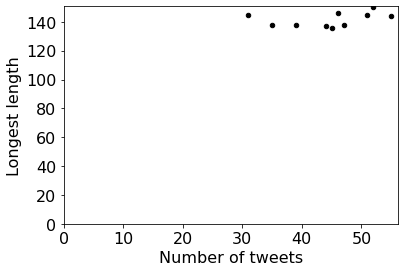

In [20]:
#q6

scatter(prolific_check, length_ranked, xlabel="Number of tweets", ylabel="Longest length")

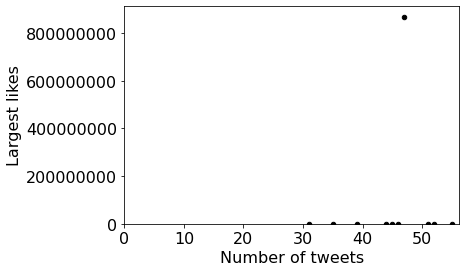

In [21]:
#q7

scatter(prolific_check, liked_check, xlabel="Number of tweets", ylabel="Largest likes")

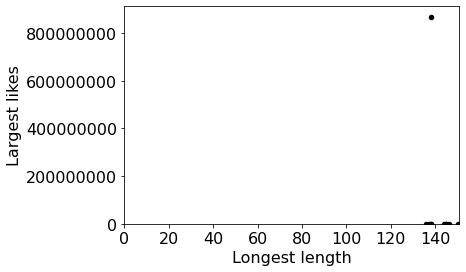

In [22]:
#q8

scatter(length_ranked, liked_check, xlabel="Longest length", ylabel="Largest likes")

In [23]:
def outlier_check(dataset):
    for pos in dataset:
        if dataset[pos] > 1000000:
            return pos

In [24]:
#q9

outlier_name = outlier_check(liked_check)
outlier_name

'USERID_2'

In [25]:
#q10
liked_long_ranked = get_bestliked("full_data")
outlier_liked = []
for pos in liked_long_ranked:
    if pos.username == outlier_name:
        outlier_liked.append(pos)

outlier_liked

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked='869M', length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USERID

In [26]:
#q11

sum_liked = 0
numbercounted = 0

for i in range(len(outlier_liked)):
    if i == 0: 
        continue
    else:
        sum_liked += outlier_liked[i][2]
        numbercounted += 1

sum_liked/numbercounted

5003.565217391304

In [27]:
def get_idnum(dataname):
    dataset_selected = []
    for pos in liked_long_ranked:
        if pos.username == dataname:
            dataset_selected.append(pos)
    return dataset_selected


In [28]:
def largest_num(dataset):
    dataset[max(dataset, key=dataset.get)] = get_idnum(max(dataset, key=dataset.get))[1][2]
    return dataset

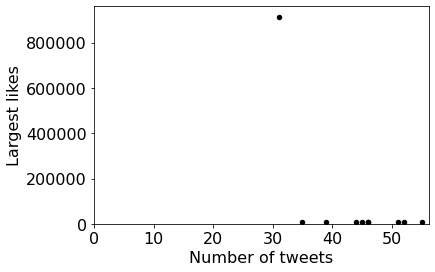

In [29]:
#q12

accurate_liked = copy.deepcopy(liked_check)
accurate_prolific = copy.deepcopy(prolific_check)

accurate_liked = largest_num(accurate_liked)
accurate_prolific[max(liked_check, key=liked_check.get)] = accurate_prolific[max(liked_check, key=liked_check.get)] - 1

scatter(accurate_prolific, accurate_liked, xlabel="Number of tweets", ylabel="Largest likes")

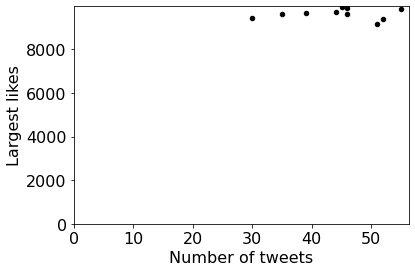

In [30]:
#q13

second_liked = copy.deepcopy(accurate_liked)
second_prolific = copy.deepcopy(accurate_prolific)

second_liked = largest_num(second_liked)
second_prolific[max(accurate_liked, key=accurate_liked.get)] = second_prolific[max(accurate_liked, key=accurate_liked.get)] - 1

scatter(second_prolific, second_liked, xlabel="Number of tweets", ylabel="Largest likes")

In [31]:
def find_dir(pathway, totalfile = []):
    currentlist = os.listdir(pathway)
    for name in currentlist:
        innerpath = os.path.join(pathway, name)
        if os.path.isfile(innerpath):
            totalfile.append(innerpath)
        elif os.path.isdir(innerpath):
            find_dir(innerpath, totalfile)
    return totalfile

In [32]:
#q14

find_dir(os.path.join("play","rb","rb8"),[])

[]

In [33]:
#q15

sorted(find_dir(os.path.join("play","ou"),[]),reverse = True)

['play\\ou\\v',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\b',
 'play\\ou\\a']

In [34]:
#q16

sorted(find_dir("play",[]), reverse = True)

['play\\rb\\rb9\\89.csv',
 'play\\rb\\rb9\\12.xls',
 'play\\rb\\ppt.ppt',
 'play\\ou\\v',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\b',
 'play\\ou\\a',
 'play\\ls\\qwe\\usun.pdf',
 'play\\ls\\qwe\\iuqwe.json',
 'play\\ls\\mf.py',
 'play\\ls\\lu.txt']

In [35]:
#q17

sorted(find_dir(os.path.join("recursive","others"),[]), reverse = True)

['recursive\\others\\USERID_9.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_10.json']

In [36]:
#q18

sorted(find_dir("recursive",[]), reverse = True)

['recursive\\others\\USERID_9.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_10.json',
 'recursive\\USERID_4\\true\\tweets.json',
 'recursive\\USERID_4\\false\\tweets.json',
 'recursive\\USERID_3\\tweets.json',
 'recursive\\USERID_2\\tweets.json',
 'recursive\\USERID_1\\tweets.json']

In [37]:
#q19

filesneeded = sorted(find_dir(os.path.join("recursive","USERID_4"),[]), reverse = True)
tweets_detected = []
for i in filesneeded:
    tweets_detected.append(len(get_jsonresult(read_json(i))))

sum(tweets_detected)

17

In [38]:
#q20

recursive_tweets = sorted(find_dir("recursive",[]), reverse = True)
tweets_recursive_file = []
for i in recursive_tweets:
    tweets_recursive_file.append(len(get_jsonresult(read_json(i))))
sum(tweets_recursive_file)

200